In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/mongo_data.csv", index_col='ts')
df = df.drop('Unnamed: 0', 1)
df.index = pd.to_datetime(df.index)
print(df.shape) 
df.tail()

C:\Users\pedro\AppData\Local\Temp\ipykernel_38840\2165620659.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)


(1928755, 45)


,thingId,S_SUM,U_L1_L2,I_SUM,F,U_L3_L1,C_phi_L1,U_L3_N,RealEc_L1,RealEd_SUM,...,Q_L1,S_L2,U_L2_N,S_L1,U_L1_N,I_L1,Rot_field,RealEc_SUM,I_L2,I_L3
ts,,,,,,,,,,,,,,,,,,,,,
2022-03-16 11:46:25.931837314+00:00,av101:compressor1,144890.16,408.87,1.08,49.97,407.98,0.97,235.64,44933936,0,...,10264.62,50062.00,236.46,47971.05,235.85,203.40,-1,131879832,211.72,198.85
2022-03-16 11:46:27.213046140+00:00,av101:compressor1,143902.53,409.29,1.12,49.97,406.56,0.99,234.81,44933952,0,...,7155.61,46749.76,236.46,49168.52,235.03,209.20,-1,131879880,197.71,204.36
2022-03-16 11:46:28.499715032+00:00,av101:compressor1,143457.63,408.75,1.14,49.97,405.88,0.99,234.87,44933968,0,...,7665.49,47098.83,236.24,49360.28,234.77,210.25,-1,131879920,199.37,200.11
2022-03-16 11:46:29.814130324+00:00,av101:compressor1,144825.58,408.98,1.09,49.97,408.18,0.97,235.72,44933988,0,...,10189.86,49460.64,236.48,48766.86,235.93,206.70,-1,131879976,209.15,197.69
2022-03-16 11:46:31.116579462+00:00,av101:compressor1,143771.91,409.67,1.14,49.97,406.51,0.98,235.17,44934000,0,...,7984.87,47779.66,236.53,48608.71,234.99,206.85,-1,131880016,202.00,201.49


In [4]:
def unique_cols(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    return (a[0] == a).all(0)

df = df.loc[:,np.invert(unique_cols(df))]
print(df.shape)
df.tail()

(1928755, 39)


,S_SUM,U_L1_L2,I_SUM,F,U_L3_L1,C_phi_L1,U_L3_N,RealEc_L1,RealEc_L2,RealEc_L3,...,S_L3,Q_L1,S_L2,U_L2_N,S_L1,U_L1_N,I_L1,RealEc_SUM,I_L2,I_L3
ts,,,,,,,,,,,,,,,,,,,,,
2022-03-16 11:46:25.931837314+00:00,144890.16,408.87,1.08,49.97,407.98,0.97,235.64,44933936,43492684,43453100,...,46857.12,10264.62,50062.00,236.46,47971.05,235.85,203.40,131879832,211.72,198.85
2022-03-16 11:46:27.213046140+00:00,143902.53,409.29,1.12,49.97,406.56,0.99,234.81,44933952,43492700,43453120,...,47984.26,7155.61,46749.76,236.46,49168.52,235.03,209.20,131879880,197.71,204.36
2022-03-16 11:46:28.499715032+00:00,143457.63,408.75,1.14,49.97,405.88,0.99,234.87,44933968,43492712,43453132,...,46998.51,7665.49,47098.83,236.24,49360.28,234.77,210.25,131879920,199.37,200.11
2022-03-16 11:46:29.814130324+00:00,144825.58,408.98,1.09,49.97,408.18,0.97,235.72,44933988,43492732,43453148,...,46598.08,10189.86,49460.64,236.48,48766.86,235.93,206.70,131879976,209.15,197.69
2022-03-16 11:46:31.116579462+00:00,143771.91,409.67,1.14,49.97,406.51,0.98,235.17,44934000,43492744,43453164,...,47383.55,7984.87,47779.66,236.53,48608.71,234.99,206.85,131880016,202.00,201.49


In [ ]:
# Plot
fig, axes = plt.subplots(nrows=39, ncols=1, dpi=120, figsize=(20,192))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=12)

plt.tight_layout();

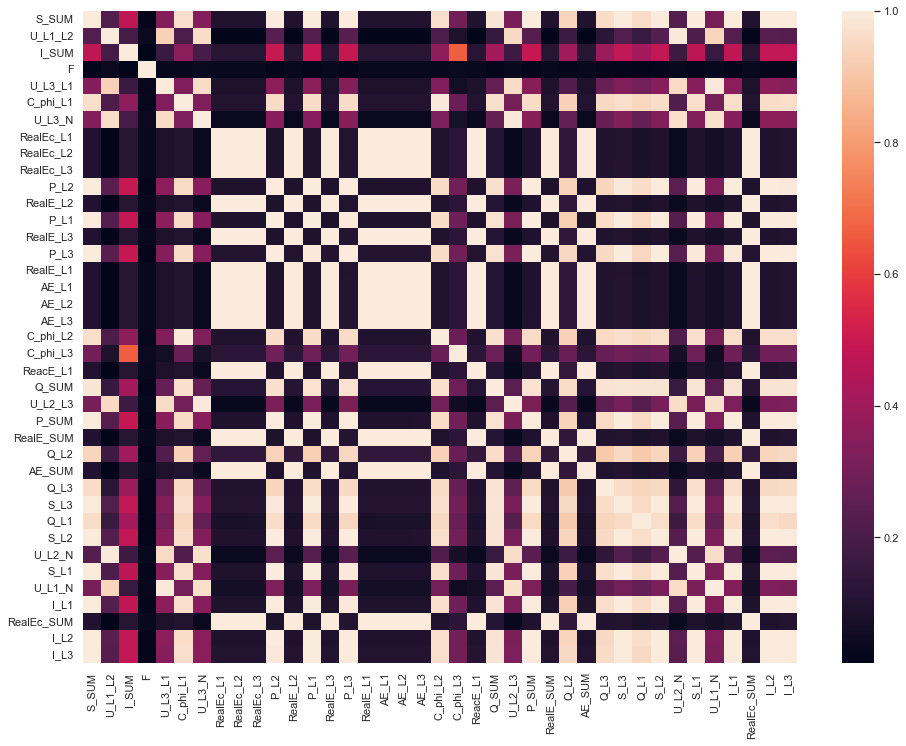

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16, 12)})
corr_matrix = df.corr().abs()
ax = sns.heatmap(corr_matrix)


In [19]:
def create_corr_group(corr, threshold=0.9):
    # Select upper triangle of correlation matrix
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    groups = {}
    for ind in range(len(upper.columns)):
        found = False
        col = upper.columns[ind]
        for g in groups:
            val = upper[col][g[1]]
            if val >= threshold:
                groups[g].append(col)
                found = True
                break
        if not found:
            groups[(col, ind)] = [col]
    return groups

corr_groups = create_corr_group(corr_matrix, threshold=0.90)

In [20]:
corr_groups

{('S_SUM', 0): ['S_SUM',
  'C_phi_L1',
  'P_L2',
  'P_L1',
  'P_L3',
  'C_phi_L2',
  'Q_SUM',
  'P_SUM',
  'Q_L2',
  'Q_L3',
  'S_L3',
  'Q_L1',
  'S_L2',
  'S_L1',
  'I_L1',
  'I_L2',
  'I_L3'],
 ('U_L1_L2', 1): ['U_L1_L2',
  'U_L3_L1',
  'U_L3_N',
  'U_L2_L3',
  'U_L2_N',
  'U_L1_N'],
 ('I_SUM', 2): ['I_SUM'],
 ('F', 3): ['F'],
 ('RealEc_L1', 7): ['RealEc_L1',
  'RealEc_L2',
  'RealEc_L3',
  'RealE_L2',
  'RealE_L3',
  'RealE_L1',
  'AE_L1',
  'AE_L2',
  'AE_L3',
  'ReacE_L1',
  'RealE_SUM',
  'AE_SUM',
  'RealEc_SUM'],
 ('C_phi_L3', 20): ['C_phi_L3']}